In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [20]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [7]:
red.isna().sum()
pd.isnull(red)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

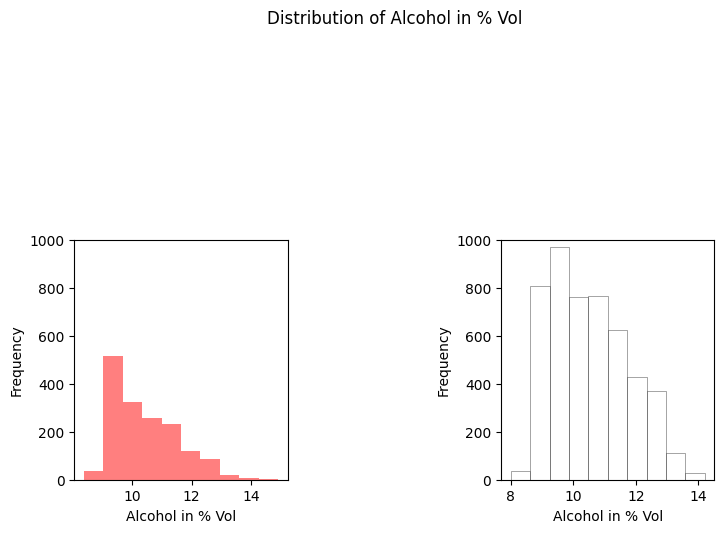

In [13]:
# Create Histogram
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor ='red',
			alpha = 0.5, label ="Red wine")

ax[1].hist(white.alcohol, 10, facecolor ='white',
		ec ="black", lw = 0.5, alpha = 0.5,
		label ="White wine")

fig.subplots_adjust(left = 0, right = 1, bottom = 0, 
			top = 0.5, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()


In [19]:
white["Type"] = 0
red["Type"] = 1

df = pd.concat([white, red])

df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
3693,6.8,0.31,0.30,8.0,0.028,33.0,122.0,0.99164,3.13,0.63,12.6,7,0
871,6.9,0.56,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,5,1
1408,7.3,0.25,0.36,13.1,0.050,35.0,200.0,0.99860,3.04,0.46,8.9,7,0
866,6.9,0.18,0.36,1.3,0.036,40.0,117.0,0.99340,3.27,0.95,9.5,7,0
70,6.2,0.27,0.43,7.8,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,6,0


In [25]:
x = df.drop("Type",axis=1)
y = df["Type"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

Model Train Using Tenserflow 

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model = Sequential()
 
# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(12, )))
 
# Add one hidden layer
model.add(Dense(9, activation ='relu'))
 
# Add an output layer
model.add(Dense(1, activation ='sigmoid'))
 
# Model output shape
model.output_shape
 
# Model summary
model.summary()
 
# Model config
model.get_config()
 
# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy', 
  optimizer ='adam', metrics =['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 10,
    validation_data = (x_test, y_test)
)

Epoch 1/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9804 - loss: 0.0649 - val_accuracy: 0.9785 - val_loss: 0.0575
Epoch 2/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9798 - loss: 0.0666 - val_accuracy: 0.9862 - val_loss: 0.0480
Epoch 3/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.9819 - loss: 0.0622 - val_accuracy: 0.9677 - val_loss: 0.0840
Epoch 4/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9824 - loss: 0.0699 - val_accuracy: 0.9585 - val_loss: 0.1239
Epoch 5/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9765 - loss: 0.0650 - val_accuracy: 0.9823 - val_loss: 0.0488
Epoch 6/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.9786 - loss: 0.0673 - val_accuracy: 0.9592 - val_loss: 0.1269
Epoch 7/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.9789 - loss: 0.0768 - val_accuracy: 0.9785 - val_loss: 0.0646
Epoch 8/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9781 - loss: 0.0709 - 

In [39]:
model.evaluate(x_test,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9802 - loss: 0.0592


[0.05612121522426605, 0.9807692170143127]

Model Save in HDT5 format

In [38]:
# Save model

model.save("wine_model.h5")